In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

## Construccion de la clase Portfolio

In [79]:
class Portfolio:
    
    def __init__(self, inputs):

        #Read params
        self.inputs = inputs
        p_name = self.inputs['portfolio_name']
        print(f"Portfolio - {p_name} - active")

        #Automatic ticks download
        self.ticks = {}
        self.download_ticks()

    #Class description
    def __repr__(self):
        return 'Intelligent Portfolio for Financial Assets Management'
    
    #Show assets ticks
    def show_ticks(self):
        for i in range(len(self.inputs['ticks'])):
            tick_name = self.inputs['ticks'][i]
            print(f'{i+1} - {tick_name}')

    #Download ticks lists in inputs
    def download_ticks(self):
        for tick in self.inputs['ticks']:
            t = yf.Ticker(tick)
            self.ticks[tick] = t

    #Draw ticks timeseries
    def tick_value(self,tick):
        data = self.ticks[tick].history(period='YTD')
        plt.figure(figsize=(8,6))
        plt.title(f'{tick} - YTD historical close values')
        plt.plot(data.index,data['Close'])
        plt.show()

    #All ticks graph value
    def ticks_values(self):
        plt.figure(figsize=(12,8))
        plt.title('Portfolio Ticks - YTD historical')
        for tick in self.ticks:
            data = self.ticks[tick].history(period='YTD')
            plt.plot(data.index,data['Close'],label=tick)
        plt.legend()
        plt.show()

    #Draw ticks returns
    def tick_return(self,tick):
        data = self.ticks[tick].history(period='YTD')
        data['returns'] = data['Close'].pct_change()
        plt.figure(figsize=(8,6))
        plt.title(f'{tick} - YTD historical returns')
        plt.plot(data.index,data['returns'])
        plt.show()

    #All ticks graph returns
    def ticks_returns(self):
        plt.figure(figsize=(12,8))
        plt.title('Portfolio Ticks - YTD returns')
        for tick in self.ticks:
            data = self.ticks[tick].history(period='YTD')
            data['returns'] = data['Close'].pct_change()
            plt.plot(data.index,data['returns'],label=tick)
        plt.legend()
        plt.show()

    def compare_ticks(self,tick1,tick2):
        data_t1 = self.ticks[tick1].history(period='YTD')
        data_t1['returns'] = data_t1['Close'].pct_change()
        data_t2 = self.ticks[tick2].history(period='YTD')
        data_t2['returns'] = data_t2['Close'].pct_change()

        plt.figure(figsize=(12,8))
        plt.title(f'Correlation of returns between {tick1} and {tick2}')
        plt.xlabel(tick1)
        plt.xlabel(tick2)

        plt.plot(data_t1['returns'],data_t2['returns'],'o')

        plt.show()

        #Corr index
        corr_index = data_t1['returns'].corr(data_t2['returns'])
        print(f'The correlation indezx between {tick1} and {tick2} is: {corr_index}')

#### Connect with API

In [80]:
spy = yf.Ticker('SPY')

### App

In [81]:
params = {
    'portfolio_name':'BlankHall Portfolio',
    'ticks':['SPY','META','AMZN','LIT','URA','TSLA']
}

In [82]:
port = Portfolio(params)

Portfolio - BlankHall Portfolio - active


In [83]:
port.download_ticks()

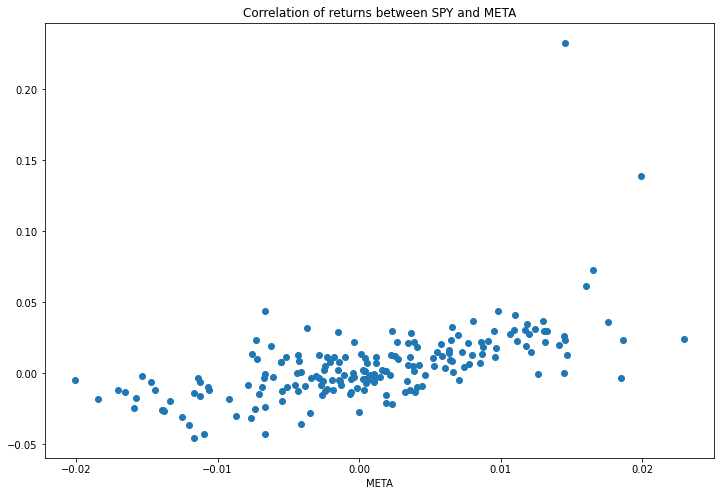

The correlation indezx between SPY and META is: 0.5909047783044958


In [84]:
#port.ticks['META'].history(period='YTD')
#port.ticks_values()
#port.ticks_returns()
port.compare_ticks('SPY','META')